In [101]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
# import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import os.path

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
def from_png_to_numpy(folder_path):
  list_of_filenames = os.listdir(folder_path)
  data = []
  for i in range(len(list_of_filenames)):
    filename = folder_path+'/'+str(i)+'.png'
    img = Image.open(filename)
    img_to_np = np.array( img, dtype='uint8' )
    data.append(img_to_np)
  return np.array(data)

In [125]:
x_train = from_png_to_numpy('/content/drive/MyDrive/Клеточные стенки/membrane/train/image') / 255
x_train.shape

(30, 512, 512)

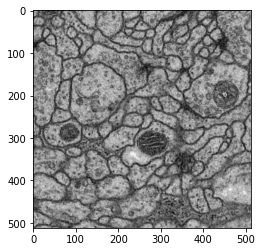

In [123]:
# Проверяем отображение
plt.imshow(x_train[3], cmap = 'gray')

In [126]:
y_train = from_png_to_numpy('/content/drive/MyDrive/Клеточные стенки/membrane/train/mask') / 255
y_train.shape

(30, 512, 512)

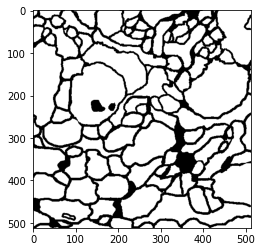

In [124]:
plt.imshow(y_train[3],cmap = 'gray')

In [127]:
x_test = from_png_to_numpy('/content/drive/MyDrive/Клеточные стенки/membrane/test/image') / 255
x_test.shape

(30, 512, 512)

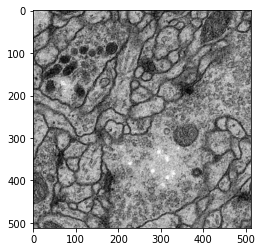

In [128]:
plt.imshow(x_test[1],cmap = 'gray')

In [129]:
input_shape = (512,512,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
     
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),        
        
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
     
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
        layers.Conv2D(16, kernel_size=(5,5), activation="relu", padding="same"),
     
        layers.Conv2D(1, kernel_size=(5,5), activation="sigmoid", padding="same"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 512, 512, 16)      416       
                                                                 
 conv2d_49 (Conv2D)          (None, 512, 512, 16)      6416      
                                                                 
 conv2d_50 (Conv2D)          (None, 512, 512, 16)      6416      
                                                                 
 conv2d_51 (Conv2D)          (None, 512, 512, 16)      6416      
                                                                 
 conv2d_52 (Conv2D)          (None, 512, 512, 16)      6416      
                                                                 
 conv2d_53 (Conv2D)          (None, 512, 512, 16)      6416      
                                                                 
 conv2d_54 (Conv2D)          (None, 512, 512, 16)     

In [133]:
batch_size = 1
epochs = 50
model.compile(loss="MSE", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 9s 123ms/step - loss: 0.1136 - accuracy: 0.8417 - val_loss: 0.1085 - val_accuracy: 0.8388
Epoch 2/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0903 - accuracy: 0.8727 - val_loss: 0.0835 - val_accuracy: 0.8898
Epoch 3/50
27/27 [==============================] - 3s 119ms/step - loss: 0.0952 - accuracy: 0.8701 - val_loss: 0.0948 - val_accuracy: 0.8750
Epoch 4/50
27/27 [==============================] - 3s 113ms/step - loss: 0.0844 - accuracy: 0.8840 - val_loss: 0.0748 - val_accuracy: 0.8991
Epoch 5/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0807 - accuracy: 0.8890 - val_loss: 0.0731 - val_accuracy: 0.9015
Epoch 6/50
27/27 [==============================] - 3s 113ms/step - loss: 0.0790 - accuracy: 0.8907 - val_loss: 0.0712 - val_accuracy: 0.9018
Epoch 7/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0813 - accuracy: 0.8884 - val_loss: 0.0713 - val_accuracy: 0.9026
Epoch 

In [134]:
y_pred = model.predict(x_test)
print(y_pred.shape)

1/1 [==============================] - 1s 695ms/step
(30, 512, 512, 1)


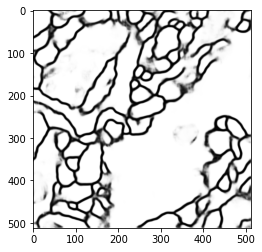

In [135]:
plt.imshow(y_pred[1], cmap='gray')
plt.show()